In [60]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [61]:

pf = pd.read_csv('../Social_Network_Ads.csv')

In [62]:
pf.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [63]:
pf.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [64]:
pf.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


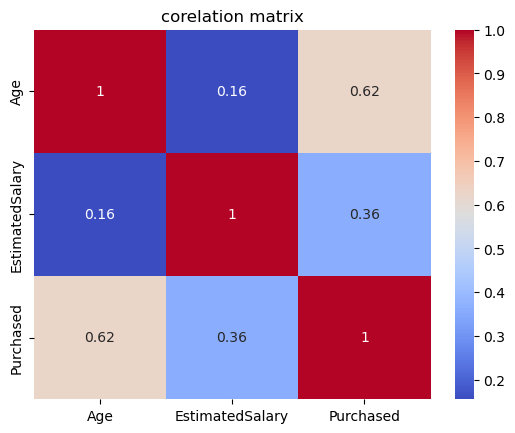

In [65]:
pf.shape
pf_corr = pf[["Age", "EstimatedSalary", "Purchased"]]

a_corr = pf_corr.corr()
plt.Figure(figsize=(100,200))
sns.heatmap(a_corr,annot=True,cmap='coolwarm')
plt.title('corelation matrix')
plt.show()

In [66]:
X = pf[["Age", "EstimatedSalary"]]
y = pf['Purchased'] 

In [67]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [69]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [70]:
y_pred = model.predict(X_test).round(1)

In [76]:
calculation = pd.DataFrame(np.c_[y_test,y_pred], columns = ["Original Salary","Predict Salary"])
calculation.head(5)

,Original Salary,Predict Salary
0,0,0
1,1,1
2,0,0
3,1,1
4,0,0


In [72]:
print("Training Accuracy :", model.score(X_train, y_train))
print("Testing Accuracy :", model.score(X_test, y_test))

Training Accuracy : 0.840625
Testing Accuracy : 0.8625


In [73]:
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

Coefficients: [[2.01253849 1.12322093]]
Intercept: [-1.0529134]
Mean Squared Error: 0.1375
R² Score: 0.39560439560439575


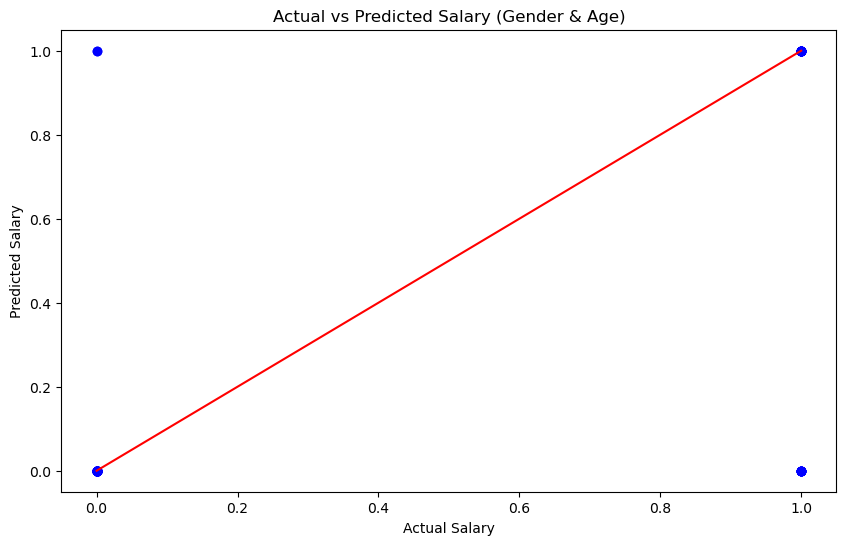

In [74]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Actual vs Predicted Salary (Gender & Age)')
plt.show()

c:\Users\gmsud\anaconda3\Lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:226: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


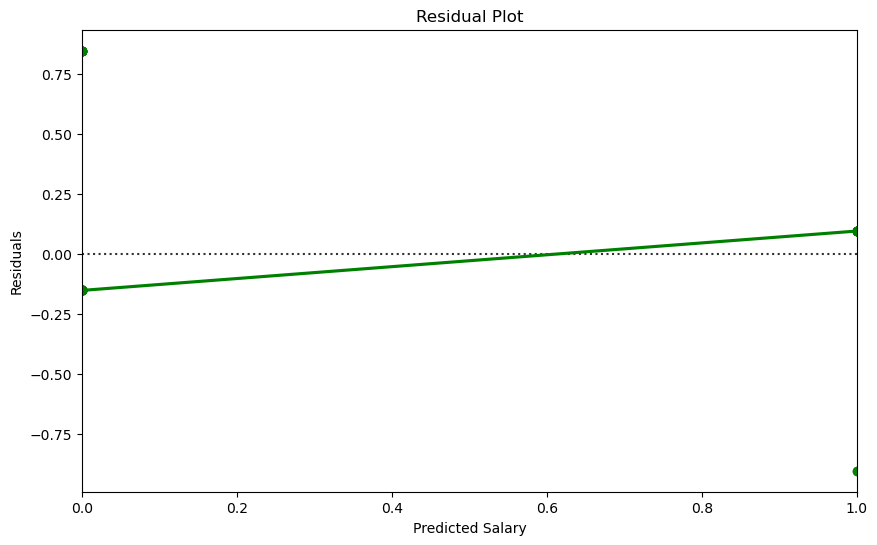

In [75]:
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.residplot(x=y_pred, y=residuals, lowess=True, color='green')
plt.xlabel('Predicted Salary')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [79]:
feature = ["25","35000"]
scale_feature = sc.transform([feature])
scale_feature

c:\Users\gmsud\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-1.20871865, -1.02020853]])

In [82]:
y_pred_test = model.predict(scale_feature)
y_pred_test  #By Using Sklearn Library

array([0], dtype=int64)